In [5]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pickle
import joblib
from sklearn.inspection import permutation_importance

In [2]:
model = pickle.load(open('/home/disk/eos9/jlu43/random_forests/model.0.8751679637015776',"rb"))

/home/disk/eos9/jlu43/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/disk/eos9/jlu43/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.tree.tree module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/disk/eos9/jlu43/anaconda3/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0

In [6]:
#TESTING DATA 
#oc is used for UIOOPS and EOL, x_test used for model

ice_test="/home/disk/eos15/ijjhsiao/Particle_Research/data/training/ice/ice_data.test.nc"
liquid_test="/home/disk/eos9/jkcm/Data/particle/liquid/liquid_data.test.nc"

ice_testdt = xr.open_dataset(ice_test)
liquid_testdt = xr.open_dataset(liquid_test)

ice_testdt = ice_testdt.drop_dims(['bin_count', 'pos_count'])
liquid_testdt = liquid_testdt.drop_dims(['bin_count', 'pos_count'])

ice_testr = [0] * len(ice_testdt.image_length)
liquid_testr = [1] * len(liquid_testdt.image_length)
y_test = np.concatenate((np.array(ice_testr), np.array(liquid_testr)))

x_test = ice_testdt.to_dataframe().append(liquid_testdt.to_dataframe(),sort=False)
x_test=x_test.drop(['Date','Time','msec','Time_in_seconds','SliceCount', 'DMT_DOF_SPEC_OVERLOAD',
             'Particle_number_all', 'particle_time', 'particle_millisec', 'inter_arrival',
             'particle_microsec', 'parent_rec_num', 'particle_num', 'image_longest_y',
             'image_auto_reject', 'image_hollow', 'image_center_in', 'image_axis_ratio',
             'part_z', 'size_factor', 'holroyd_habit','datetime','area_hole_ratio'],axis=1)

x_test['phase']=y_test
small_test = x_test.query("image_area >= 0.0025 and image_area < 0.01")
medium_test = x_test.query("image_area >= 0.01 and image_area < 0.07")
big_test = x_test.query("image_area >= 0.07")

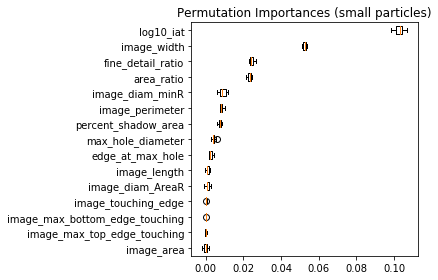

[-6.428571428567232e-05,
 4.285714285717779e-05,
 0.00017142857142862233,
 0.0003071428571429058,
 0.0010071428571428842,
 0.0010571428571428787,
 0.002628571428571458,
 0.0042000000000000145,
 0.007585714285714318,
 0.008421428571428613,
 0.00910000000000003,
 0.023235714285714314,
 0.024435714285714318,
 0.0525714285714286,
 0.10289285714285716]

In [10]:
result = permutation_importance(model, small_test.drop('phase', axis=1), small_test.phase, n_repeats=10,
                                random_state=42)

sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=x_test.columns[sorted_idx])
ax.set_title("Permutation Importances (small particles)")
fig.tight_layout()

plt.show()

sorted(result['importances_mean'])

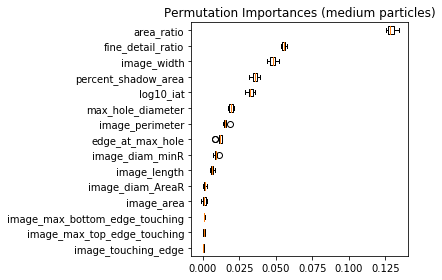

[0.0004999999999999782,
 0.0008999999999999564,
 0.0010230769230768933,
 0.0012076923076922764,
 0.0014923076923076596,
 0.006638461538461515,
 0.008769230769230741,
 0.011669230769230732,
 0.015492307692307661,
 0.019399999999999962,
 0.03276153846153845,
 0.03573846153846152,
 0.047999999999999966,
 0.05541538461538459,
 0.12885384615384612]

In [11]:
mresult = permutation_importance(model, medium_test.drop('phase', axis=1), medium_test.phase, n_repeats=10,
                                random_state=42)

msorted_idx = mresult.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(mresult.importances[msorted_idx].T,
           vert=False, labels=x_test.columns[msorted_idx])
ax.set_title("Permutation Importances (medium particles)")
fig.tight_layout()
plt.show()

sorted(mresult['importances_mean'])

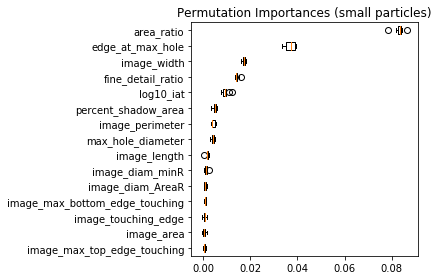

[0.0005319148936170137,
 0.0005319148936170249,
 0.0006382978723404431,
 0.0008936170212765937,
 0.0009148936170212729,
 0.0011702127659574569,
 0.0016595744680850898,
 0.004170212765957426,
 0.004191489361702117,
 0.0048723404255318955,
 0.009425531914893625,
 0.014255319148936175,
 0.017276595744680833,
 0.03689361702127657,
 0.08314893617021277]

In [12]:
bresult = permutation_importance(model, big_test.drop('phase', axis=1), big_test.phase, n_repeats=10,
                                random_state=42)
bsorted_idx = bresult.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(bresult.importances[bsorted_idx].T,
           vert=False, labels=x_test.columns[bsorted_idx])
ax.set_title("Permutation Importances (small particles)")
fig.tight_layout()
plt.show()

sorted(bresult['importances_mean'])

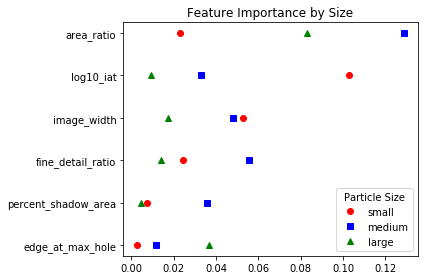

In [13]:
fig, ax = plt.subplots()
ax.plot([0.10289, 0.05257, 0.02444, 0.02324, 0.00759, 0.00263], [5, 4, 3, 6, 2, 1], 'ro', label='small')
ax.plot([0.12885, 0.05542, 0.04799, 0.03578, 0.03276, 0.01167], [6, 3, 4, 2, 5, 1], 'bs', label='medium')
ax.plot([0.08315, 0.03689, 0.01728, 0.01425, 0.00952, 0.00487], [6, 1, 4, 3, 5, 2], 'g^', label='large')
ax.set_yticklabels(['','edge_at_max_hole','percent_shadow_area','fine_detail_ratio','image_width','log10_iat','area_ratio'])
ax.legend(title="Particle Size")
ax.set_title('Feature Importance by Size')
fig.tight_layout()
plt.savefig("feature_importances.png", dpi=400)
plt.show()